In [3]:
# @title Default title text
import pandas as pd
import seaborn as sns
link = pd.read_csv('/content/linkedin-reviews.csv')
print(link)




                                                Review  Rating
0    Does absolutely nothing for a LinkedIn beginne...       1
1                              Force close(galaxy tab)       1
2    Slow and it tries to upload your contacts with...       1
3    Add ability to customize the profile and move ...       4
4    Good app, but it's a pain that it's not possib...       4
..                                                 ...     ...
697  Can't trust, Going to uninstall just for that ...       1
698  It really gets me linked in with my friends. H...       5
699  It lacks most of what makes the other social n...       4
700  Really disappointed in the new version. Seems ...       2
701  One of the best looking and well designed apps...       5

[702 rows x 2 columns]


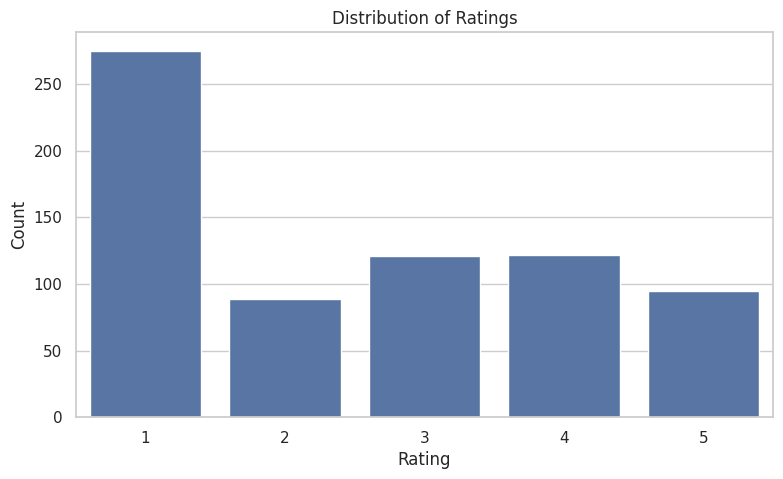

In [6]:
# Explaoratory Data Analysis
# We will start analyazing the disbtributions of ratings . it will provide insight into the overall
# sentiment of the reviews . Then we can futher such as analyazing the length of reviews
#  and possibly dervie insisghts from the text of the reviews


#Plotting the Distribution of Ratings
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns




sns.set(style="whitegrid")
plt.figure(figsize=(9,5))
sns.countplot(data = link , x = 'Rating')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


# Adding Sentiment Labels in the Data

We will use Textblob libary. Textblob provides a polarity scores raning from -1(very negatiive) to 1 (very postive) fro a given text . We can use this score to classify each review's sentiment as psostive , negaative or netural .

In [8]:
from textblob import TextBlob
!pip install textblob



In [9]:
def TextBlob_sentiment_analysis(review):
    sentiment = TextBlob(review).sentiment
    if sentiment.polarity > 0.1:
        return 'Positive'
    elif sentiment.polarity < -0.1:
        return 'Negative'
    else:
        return 'Neutral'


In [12]:
link['Sentiment'] = link['Review'].apply(TextBlob_sentiment_analysis)


In [13]:
link.sample(5)

,Review,Rating,Sentiment
534,They have no business accessing my contacts. I...,1,Positive
169,Cannot even sign in- Galaxy ace,1,Neutral
590,Need facility to move to SD,3,Neutral
86,"Bad app, uninstalled. Force close on xperia x1...",1,Negative
591,Really Impressive !!!!!,5,Positive


# Analyzing App Reviews Sentiments


In [14]:
Sentiment_distribution = link['Sentiment'].value_counts()
print(Sentiment_distribution)

Sentiment
Positive    298
Neutral     297
Negative    107
Name: count, dtype: int64


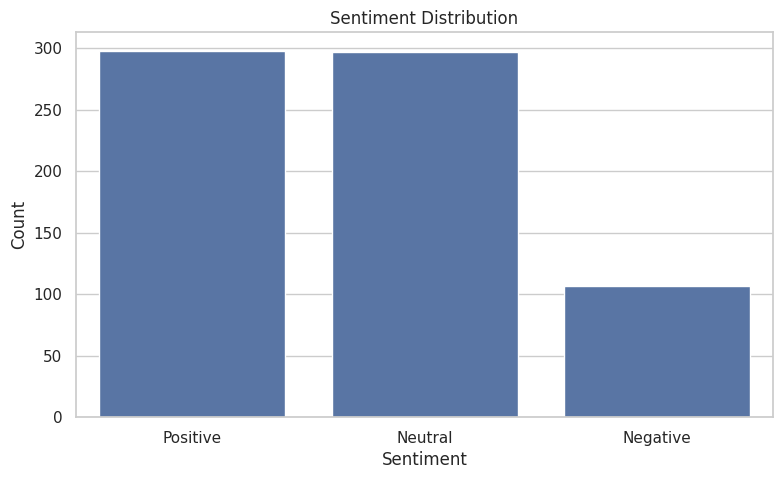

In [21]:
!pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(9,5))
sns.barplot(x= Sentiment_distribution.index , y = Sentiment_distribution.values)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# **So we can see although the app has low ratings , still the reviewers don't use many negative words in the reviews for thr app**

Next,  we'll explore thre realtionship between the sentiments and the ratings . This analysis can help us undersdtand there is a corealtion b/w the sentimenet of the trxt and numerical ratings.

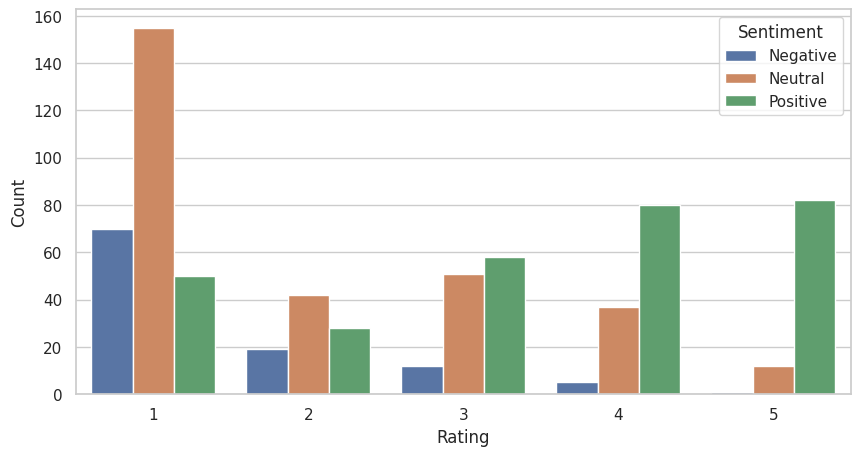

In [22]:
plt.figure(figsize=(10,5))
sns.countplot(data = link , x = 'Rating' , hue = 'Sentiment')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.legend(title = 'Sentiment')
plt.show()


In [24]:
import pandas as pd
import numpy as np


df = pd.read_csv("/content/placement.csv")
df.head(3)

,cgpa,resume_score,placed
0,8.14,6.52,1
1,6.17,5.17,0
2,8.27,8.86,1


In [25]:
df.isnull().sum()

cgpa            0
resume_score    0
placed          0
dtype: int64

In [26]:
df.shape


(100, 3)

In [27]:
x = df.drop(columns = ['placed'] , axis = 1)   ## Input columns
y = df['placed']    ## target column

In [29]:
# @title Default title text
print(x.shape)
print(y.shape)

(100, 2)
(100,)


In [31]:


from sklearn.model_selection import train_test_split

In [32]:


x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.2 , random_state = 42) # Split data into training and testing sets

In [34]:
print(x_train.shape)
print(y_test.shape)
print(x_test.shape)
print(y_train.shape)

(80, 2)
(20,)
(20, 2)
(80,)


# Standardrization

In [35]:
np.round(x_train.describe(),2)

,cgpa,resume_score
count,80.00,80.00
mean,6.95,7.00
std,1.13,1.01
min,5.27,4.95
25%,6.00,6.28
50%,6.62,7.15
75%,8.06,7.69
max,9.31,9.06


In [36]:
from sklearn.preprocessing import StandardScaler

In [37]:
sc = StandardScaler()

In [40]:
x_train_sc = sc.fit_transform(x_train)


In [43]:
x_train_new = pd.DataFrame(x_train_sc , columns = x.columns)

In [44]:
x_train_new.head(3)

,cgpa,resume_score
0,-0.008602,-0.128926
1,1.001293,-0.925381
2,-0.607389,-0.527154


# ***Normalization***

In [45]:
from sklearn.preprocessing import MinMaxScaler

In [46]:
mn = MinMaxScaler()

In [47]:
x_train_mn = mn.fit_transform(x_train)

In [49]:
x_train_new = pd.DataFrame(x_train_mn , columns = x.columns)

In [50]:
np.round(x_train_new.describe(),2)

,cgpa,resume_score
count,80.00,80.00
mean,0.42,0.50
std,0.28,0.25
min,0.00,0.00
25%,0.18,0.32
50%,0.33,0.54
75%,0.69,0.67
max,1.00,1.00


# **Encoding ===> Convert categirical data into numerical data ***

In [51]:
df = pd.read_csv("/content/tips.csv")

In [52]:
df.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


In [53]:
df['sex'].value_counts()df

sex
Male      157
Female     87
Name: count, dtype: int64

In [54]:
df['smoker'].value_counts()

smoker
No     151
Yes     93
Name: count, dtype: int64

In [55]:
df['day'].value_counts()

day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64

In [56]:
df['time'].value_counts()

time
Dinner    176
Lunch      68
Name: count, dtype: int64

In [57]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [85]:
from sklearn.preprocessing import LabelEncoder

In [59]:
lb = LabelEncoder()

In [60]:
df['sex'] = lb.fit_transform(df['sex'])
df['smoker'] = lb.fit_transform(df['smoker'])
df['day'] = lb.fit_transform(df['day'])
df['time'] = lb.fit_transform(df['time'])

In [61]:
df.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,2,0,2
1,10.34,1.66,1,0,2,0,3
2,21.01,3.50,1,0,2,0,3


In [62]:
x = df.drop(columns = ['total_bill'] , axis = 1)   ## Input columns
y = df['total_bill']    ## target column

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.2 , random_state = 42) # Split data into training and testing sets

In [65]:
print("Toal data shape : ", df.shape)
print("Independant data shape : ", x.shape)
print("Dependent data shape : ", y.shape)
print("x_train data shape : ", x_train.shape)
print("x_test data shape : ", x_test.shape)
print("y_train data shape : ", y_train.shape)
print("y_test data shape : ", y_test.shape)

Toal data shape :  (244, 7)
Independant data shape :  (244, 6)
Dependent data shape :  (244,)
x_train data shape :  (195, 6)
x_test data shape :  (49, 6)
y_train data shape :  (195,)
y_test data shape :  (49,)


# **Standardrization**

In [66]:
from sklearn.preprocessing import StandardScaler

In [67]:
sc = StandardScaler()

In [68]:
x_train_sc = sc.fit_transform(x_train)

In [69]:
x_train_new = pd.DataFrame(x_train_sc , columns = x.columns)

In [70]:
np.round(x_train_new.describe(),2)

,tip,sex,smoker,day,time,size
count,195.00,195.00,195.00,195.00,195.00,195.00
mean,-0.00,-0.00,0.00,0.00,0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.46,-1.37,-0.79,-1.84,-0.61,-1.68
25%,-0.76,-1.37,-0.79,-0.76,-0.61,-0.61
50%,-0.06,0.73,-0.79,0.31,-0.61,-0.61
75%,0.43,0.73,1.26,0.31,1.64,0.45
max,4.85,0.73,1.26,1.39,1.64,3.65


# **Normalization**

In [71]:
from sklearn.preprocessing import MinMaxScaler

In [72]:
mn = MinMaxScaler()

In [73]:
x_train_mn = mn.fit_transform(x_train)

In [74]:
x_train_new = pd.DataFrame(x_train_mn , columns = x.columns)

In [75]:
np.round(x_train_new.describe(),2)

,tip,sex,smoker,day,time,size
count,195.00,195.00,195.00,195.00,195.00,195.00
mean,0.23,0.65,0.38,0.57,0.27,0.31
std,0.16,0.48,0.49,0.31,0.45,0.19
min,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.11,0.00,0.00,0.33,0.00,0.20
50%,0.22,1.00,0.00,0.67,0.00,0.20
75%,0.30,1.00,1.00,0.67,1.00,0.40
max,1.00,1.00,1.00,1.00,1.00,1.00


In [76]:
df = pd.read_csv("/content/Social_Network_Ads.csv")


In [77]:
df.head(3)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0


In [78]:
df['User ID'].value_counts()

User ID
15624510    1
15767681    1
15589449    1
15791373    1
15688172    1
           ..
15675185    1
15792102    1
15722758    1
15745232    1
15594041    1
Name: count, Length: 400, dtype: int64

In [79]:
df['EstimatedSalary'].value_counts()

EstimatedSalary
72000     12
80000     11
79000     10
75000      9
71000      9
          ..
123000     1
37000      1
115000     1
148000     1
139000     1
Name: count, Length: 117, dtype: int64

In [80]:
df['Age'].value_counts()

Age
35    32
37    20
26    16
41    16
42    16
39    15
40    15
48    14
47    14
27    13
38    13
28    12
36    12
46    12
31    11
30    11
49    10
29    10
33     9
32     9
24     9
59     7
19     7
45     7
20     7
60     7
34     6
23     6
52     6
25     6
58     6
53     5
57     5
22     5
18     5
21     4
50     4
54     4
55     3
56     3
51     3
43     3
44     2
Name: count, dtype: int64

In [81]:
df['Gender'].value_counts()

Gender
Female    204
Male      196
Name: count, dtype: int64

In [82]:
df['Purchased'].value_counts()

Purchased
0    257
1    143
Name: count, dtype: int64

In [83]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [86]:
from sklearn.preprocessing import LabelEncoder

In [87]:
lb = LabelEncoder()

In [88]:
df['User ID'] = lb.fit_transform(df['User ID'])
df['EstimatedSalary'] = lb.fit_transform(df['EstimatedSalary'])
df['Age'] = lb.fit_transform(df['Age'])
df['Gender'] = lb.fit_transform(df['Gender'])
df['Purchased'] = lb.fit_transform(df['Purchased'])


In [90]:
df.head(3)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,97,1,1,4,0
1,392,1,17,5,0
2,155,0,8,26,0


In [92]:
x = df.drop(columns = ['User ID'] , axis = 1)   ## Input columns
y = df['User ID']    ## target column

In [93]:
from sklearn.model_selection import train_test_split

In [94]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.2 , random_state = 42) # Split data into training and testing sets

In [95]:
print("Toal data shape : ", df.shape)
print("Independant data shape : ", x.shape)
print("Dependent data shape : ", y.shape)
print("x_train data shape : ", x_train.shape)
print("x_test data shape : ", x_test.shape)
print("y_train data shape : ", y_train.shape)
print("y_test data shape : ", y_test.shape)

Toal data shape :  (400, 5)
Independant data shape :  (400, 4)
Dependent data shape :  (400,)
x_train data shape :  (320, 4)
x_test data shape :  (80, 4)
y_train data shape :  (320,)
y_test data shape :  (80,)


# **Standardriazation**

In [96]:
from sklearn.preprocessing import StandardScaler

In [97]:
sc = StandardScaler()

In [98]:
x_train_sc = sc.fit_transform(x_train)

In [99]:
x_train_new = pd.DataFrame(x_train_sc , columns = x.columns)

In [100]:
np.round(x_train_new.describe(),2)

,Gender,Age,EstimatedSalary,Purchased
count,320.0,320.00,320.00,320.00
mean,0.0,0.00,0.00,0.00
std,1.0,1.00,1.00,1.00
min,-1.0,-1.95,-1.69,-0.75
25%,-1.0,-0.77,-0.82,-0.75
50%,0.0,-0.09,0.05,-0.75
75%,1.0,0.70,0.61,1.34
max,1.0,2.17,2.18,1.34


# **Normalization **

In [101]:
from sklearn.preprocessing import MinMaxScaler

In [102]:
mn = MinMaxScaler()

In [103]:
x_train_mn = mn.fit_transform(x_train)

In [104]:
x_train_new = pd.DataFrame(x_train_mn , columns = x.columns)

In [105]:
np.round(x_train_new.describe(),2)

,Gender,Age,EstimatedSalary,Purchased
count,320.0,320.00,320.00,320.00
mean,0.5,0.47,0.44,0.36
std,0.5,0.24,0.26,0.48
min,0.0,0.00,0.00,0.00
25%,0.0,0.29,0.22,0.00
50%,0.5,0.45,0.45,0.00
75%,1.0,0.64,0.59,1.00
max,1.0,1.00,1.00,1.00


In [106]:
df = pd.read_csv("/content/covid_toy.csv")

In [107]:
df.isnull().sum()

age           0
gender        0
fever        10
cough         0
city          0
has_covid     0
dtype: int64

In [117]:
x = df.dropna()

In [118]:
df.isnull().sum()

age          0
gender       0
fever        0
cough        0
city         0
has_covid    0
dtype: int64

In [119]:
df.head(3)

,age,gender,fever,cough,city,has_covid
0,60,Male,103.0,Mild,Kolkata,No
1,27,Male,100.0,Mild,Delhi,Yes
2,42,Male,101.0,Mild,Delhi,No


In [120]:
df['gender'].value_counts()

gender
Female    54
Male      36
Name: count, dtype: int64

In [121]:
df['cough'].value_counts()

cough
Mild      57
Strong    33
Name: count, dtype: int64

In [115]:
df['city'].value_counts()

city
Kolkata      29
Bangalore    28
Delhi        20
Mumbai       13
Name: count, dtype: int64

In [116]:
df['has_covid'].value_counts()

has_covid
No     52
Yes    38
Name: count, dtype: int64

In [126]:
from sklearn.preprocessing import LabelEncoder

In [127]:
lb = LabelEncoder()

In [128]:
df['gender'] = lb.fit_transform(df['gender'])
df['cough'] = lb.fit_transform(df['cough'])
df['city'] = lb.fit_transform(df['city'])
df['has_covid'] = lb.fit_transform(df['has_covid'])


In [132]:
x = df.drop(columns = ['gender'] , axis = 1)   ## Input columns
y = df['gender']    ## target column

In [133]:
from sklearn.model_selection import train_test_split

In [134]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.2 , random_state = 42) # Split data into training and testing sets

In [135]:
print("Toal data shape : ", df.shape)
print("Independant data shape : ", x.shape)
print("Dependent data shape : ", y.shape)
print("x_train data shape : ", x_train.shape)
print("x_test data shape : ", x_test.shape)
print("y_train data shape : ", y_train.shape)
print("y_test data shape : ", y_test.shape)

Toal data shape :  (90, 6)
Independant data shape :  (90, 5)
Dependent data shape :  (90,)
x_train data shape :  (72, 5)
x_test data shape :  (18, 5)
y_train data shape :  (72,)
y_test data shape :  (18,)


# **Standardrization**

In [136]:
from sklearn.preprocessing import StandardScaler

In [137]:
sc = StandardScaler()

In [138]:
x_train_sc = sc.fit_transform(x_train)

In [139]:
x_train_new = pd.DataFrame(x_train_sc , columns = x.columns)

In [141]:
np.round(x_train_new.describe(),2)

,age,fever,cough,city,has_covid
count,72.00,72.00,72.00,72.00,72.00
mean,-0.00,-0.00,0.00,0.00,0.00
std,1.01,1.01,1.01,1.01,1.01
min,-1.53,-1.30,-0.73,-1.20,-0.80
25%,-0.95,-0.83,-0.73,-1.20,-0.80
50%,0.14,0.13,-0.73,-0.24,-0.80
75%,0.86,0.72,1.37,0.72,1.25
max,1.57,1.55,1.37,1.69,1.25
